In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

%matplotlib inline

# Table of Contents

### Exercise 8.4.1

Draw an example (of your own invention) of a partition of twodimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2, \dots$ the cutpoints $t_1 , t_2 , \dots$ and so forth.

__Answer__ (handwritten, forgive me):

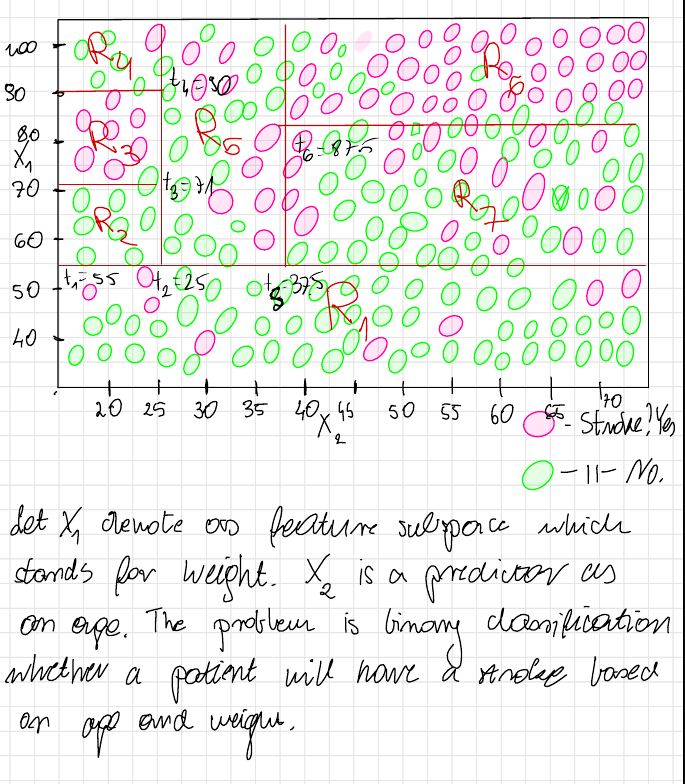

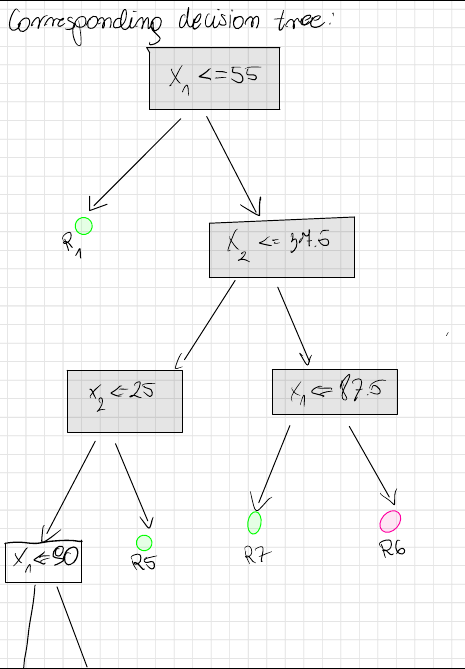

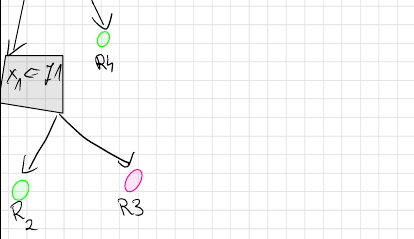



### Exercise 8.4.2

It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form:

$$
f(X) = \sum_{j=1}^{p}f_j(X_j)
$$

Explain, why this is the case. You can begin with (8.12) in Algorithm 8.2.

__Answer__:

$$
f(X) = \sum_{j=1}^{p}f_j(X_j)
$$

In boosting, each decision stump is fit to the residual of the current method. That is, each stump is trying to correct the mistakes of current ensemble of stumps. This is reflected upon step of boosting algorithm:

$$
\hat{f}^{b}(x) = \hat{f}^{b-1}(x) + \lambda \hat{f}^{b}(x)
$$

When:

- $\hat{f}^{b-1}$ is the previous fitted model,
- $\lambda$ - learning rate,
- $\hat{f}^{b}(x)$ - fit of the residuals obtained from $\hat{f}^{b-1}$

The decision stump is a tree with one split. This means, it divides a feature space into two regions, and assigns constant prediction to each region, i.e.:

$$
\hat{f}^{b}(x) = c_1 I(x \le t) + c_2 I(x \gt t)
$$

Where:
- $I(\cdot)$ - is an indicator function,
- $t$ - a point $t$ to split,
- $c_1, c_2$ are constant predictions in each region.

We can substitute that into the update for  boosting algorithm:

$$
\hat{f}^{b}(x) = \hat{f}^{b-1}(x) + \lambda \left[ c_1 \cdot I(x \le t) + c_2 \cdot I(x \gt t)\right]
$$

So, repeating that $B$ times, we obtain an additive model, i.e.:

$$
\hat{f}(x) = \sum_{i=1}^{B} \lambda f^{B}(x)
$$

### Exercise 8.4.3 

Consider the Gini Index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The $x$-axis should display $\hat{p}_{m1}$, raniging from $0$ to $1$, and the $y$-axis should display the value of the Gini Index, classification error and entropy.

In [3]:
def calculate_gini_index(class_probs):
    return 1 - np.sum(class_probs**2)

def calculate_entropy(class_probs):
    return -np.sum(class_probs * np.log2(np.maximum(class_probs, 1e-15)))

def calculate_classification_error(class_probs):
    return 1 - np.max(class_probs)

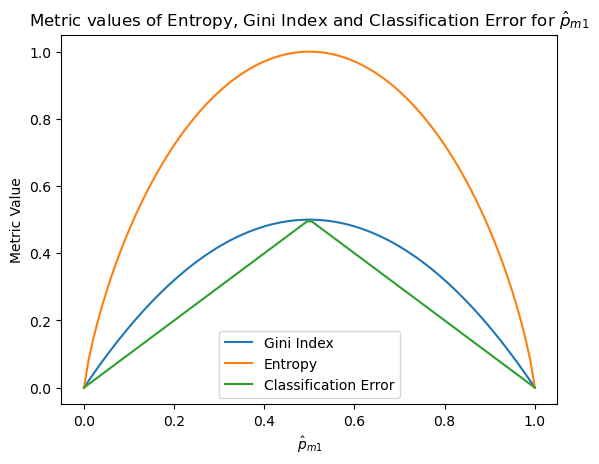

In [4]:
p_m1_values = np.linspace(0, 1, 100)

gini_values = []
entropy_values = []
classification_error_values = []

for p_m1 in p_m1_values:
    class_probs = np.array([p_m1, 1 - p_m1])
    gini_values.append(calculate_gini_index(class_probs))
    entropy_values.append(calculate_entropy(class_probs))
    classification_error_values.append(calculate_classification_error(class_probs))

plt.plot(p_m1_values, gini_values, label='Gini Index')
plt.plot(p_m1_values, entropy_values, label='Entropy')
plt.plot(p_m1_values, classification_error_values, label='Classification Error')

plt.title('Metric values of Entropy, Gini Index and Classification Error for $\hat{p}_{m1}$')
plt.xlabel(r'$\hat{p}_{m1}$')
plt.ylabel('Metric Value')
plt.legend()

plt.show()

### Exercise 8.4.3

This question relates to the plots in Figure 8.14:

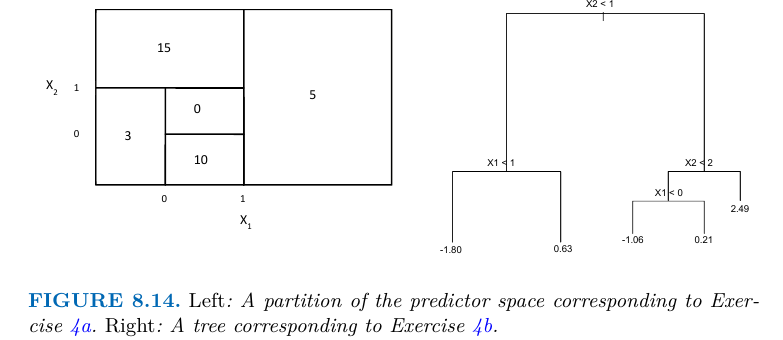

#### Exercise 8.4.3 a

Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of $Y$ within each region.

#### Exercise 8.4.3 b

Create a diagram similar to the left-hand panel of Figure 8.14, using the tree ilustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

### Exercise 8.4.5 

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of $\mathbb{P}(\text{Class is Red} \mid X)$:

$$
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, \text{ and } 0.75.
$$

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

Let $\mathbb{P}(X) \ge 0.5$ indicate class $\mathbb{Y} = \text{Red}$ and otherwise class $\mathbb{Y} = \text{Green}$.

Majority vote will classify the sample to the $\text{Red}$ class, whereas the average probability would estimate that bootstrapped samples belong to the $\text{Green}$ class.

In [13]:
probabilities = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])
majority_vote = Counter(np.where(probabilities >= 0.5, 'Red', 'Green')).most_common(1)
majority_vote

[('Red', 6)]

In [14]:
avg_probs = np.sum(probabilities) / len(probabilities)
avg_probs

0.45

### Exercise 8.4.6 

Provide a detailed explanation of the algorithm that is used to fit a regression tree.

In regression tree, we must startify (categorize) a feature space $X$ into a distinct, non-overlapping regions $R_1, \dots, R_j$.

Regression Trees, upon  that non-overlapping regions, classify a sample $X$ by comparing values of that feature $X$ to that specified cutpoints $s$ which determine the split of feature space, the overall prediction is the average of corresponding training dependent variable in region $R$ for particular observation of $X$.

Now, we can ask — How the tree is build?

1. We divide the predictor space, i.e. the set of possible features $X_1, X_2, \dots, X_p$ into $J$ distinct, non-overlapping regions: $R_1, R_2, \dots, R_J$:<br>
    1.1 The choice of specific regions, i.e. $R_1, R_2, \dots, R_J$ is determined by a split of predictor space into, so called: *high dimensional boxes*, i.e. the goal is to find such regions $R_1, R_2, \dots, R_j$ that minimze the $\text{RSS}$ or $\text{MSE}$ given by:
   $$
        \text{RSS} = \sum_{j=1}^{J}\sum\left(y_i - \hat{y}_{R_j}\right)^{2}
   $$
   Where:<br>
       - $\hat{y}_{R_j}$ is the mean response of the training observations within the $j$th box or in other words: $R_j$<br>
    1.2 The split is performed by *recursive binary splitting*, i.e. we start from a root (the point at which all observations belong to the single specific region) and that method of splitting is greedy, because we perform split at particular step without looking ahead and picking the best split: <br>
   1.2.1 To perform *recursive binary spltting* we select a first predictor $X_j$ and specific cut-point $s$ that splits predictor $X_j$ into two regions:<br>
       $$
            \{X \mid X_j \lt s\} \text{ and } \{ X \mid X_j \ge s \}
       $$
       1.2.2 We consider all predictors: $X_1, \dots, X_j$ and all cutpoints $s$ for each each predictors and then, we pick a specific predictor $X_j$ and cutpoint $s$ that result in the lowest possible $\text{RSS}$:
       $$
        R_1(j, s) = \{ X \mid X_j \lt s \} \text{ } \& \text{ } R_2(j, s) = \{ X \mid X_j \ge s \}
       $$<br>
       We seek the value of $j$ and $s$ that minimize the equation:
       $$
        \sum_{i: x_i \in R_1(j,s)}(y_i - \hat{y}_{R_1})^{2} + \sum_{i: x_i \in R_2(j,s)}(y_i - \hat{y}_{R_2})^{2}
       $$
       1.2.3 The splitting is performed untill specific criteria of stop is met:<br>
        - the `max_depth` which is the depth of tree, the tree stops to grow when depth of tree equals to `max_depth`<br>
        - the `min_leaf_nodes` when terminal nodes has a minimum number of nodes.<br>
3. Cost Complexity Pruning or Weakest Link Pruning:<br>
    2.1 We grow large tree $T_0$ which tends to overfit to a data. The *Cost Complexity Pruning* is technique to get a subtree $T$ from a very large grown tree $T_0$ to reduce the variance at cost of little increase in the bias. The CCP does not check all possible trees, but it checks a subsequence of subtrees indexed by a tuning parameter $\alpha$:<br>
    2.2 For each non-negative parameter $\alpha$, there exists a subtree $T \subset T_0$ such that:
    $$
        \sum_{m=1}^{\mid T \mid}\sum_{i: x_i \in R_m}(y_i - \hat{y}_{R_m})^{2} + \alpha \mid T \mid
    $$<br>
    Where:<br>
       - $\mid T \mid$ indicates the number of terminal nodes for each subtree $T$,<br>
       - $R_m$ is the rectangle (region, or *box*, i.e. the subset of predictor space) corresponding to the $m$th terminal node,<br>
       - $\hat{y}_{R_m}$ predicted response associated with $R_m$, the mean of training observations which belong to the region $R_m$.<br>
    The tuning parameter $\alpha$ controls a trade-off between subtree's complexity and fits to the data, i.e. it penalizes more if given subtree has more terminal nodes and the penalty function will tend to minimize for a smaller tree.<br>
    When $\alpha = 0$, then we would obtain full, grown tree $T_0$.<br>
    To find an optimal $\alpha$ we can perfrom cross validation.